# Handwritten Digit Recognition with Neural Networks


 **Importing Packages for the model**

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

**Load and preprocess the MNIST dataset**

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


*Shape of training data set*

In [ ]:
X_train.shape

(60000, 28, 28)

*Shape of testing data set*

In [ ]:
X_test.shape

(10000, 28, 28)

**Showing what image is used in training**

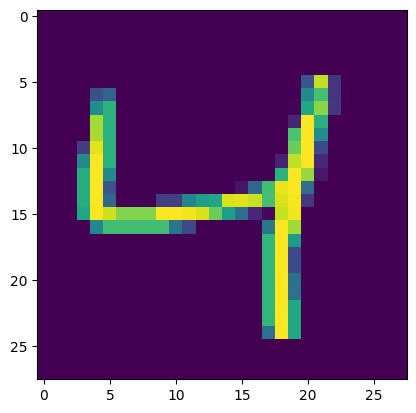

In [ ]:
plt.imshow(X_train[2])

**Normalizing the values for both training and tesing datasets(pixels)**

In [ ]:
X_train=X_train/255
X_test=X_test/255

**Define the model architecture**

We are using the following for architecture :


1. 128 neuron dense ReLU function (first hidden layer)
2. 32 neuron dense ReLU  function(second hidden layer)
3. 10 neuron output layer of softmax function



In [ ]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))#we have to n*n array to 1 d array for givng input to ann
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))


model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Summary of the model after passing through each layer of the architecture**

It means it is used for giving information about the type,output shape and number of parmeters for each layer

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

**Compiling the model**

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

**Training the model for 20 epochs and printing its accuracy and loss**

In [ ]:
history=model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8560 - loss: 0.4978 - val_accuracy: 0.9582 - val_loss: 0.1440
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9625 - loss: 0.1246 - val_accuracy: 0.9676 - val_loss: 0.1105
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9755 - loss: 0.0787 - val_accuracy: 0.9689 - val_loss: 0.1024
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9819 - loss: 0.0579 - val_accuracy: 0.9727 - val_loss: 0.0988
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9857 - loss: 0.0429 - val_accuracy: 0.9710 - val_loss: 0.1019
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9877 - loss: 0.0358 - val_accuracy: 0.9707 - val_loss: 0.1010
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9916 - loss: 0.0274 - val_accuracy: 0.9713 - val_loss: 0.1039
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9912 - loss: 0.02

**Making predictions**

In [ ]:
y_prob=model.predict(X_test)
y_pred=y_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Preparing a confusion matrix**

* Diagonal elements: Represent correct predictions (TP and TN).
* Off-diagonal elements: Represent incorrect predictions (FP and FN).



In [ ]:
cm = confusion_matrix(y_test, y_pred)

*Representation of the confusion matrix*

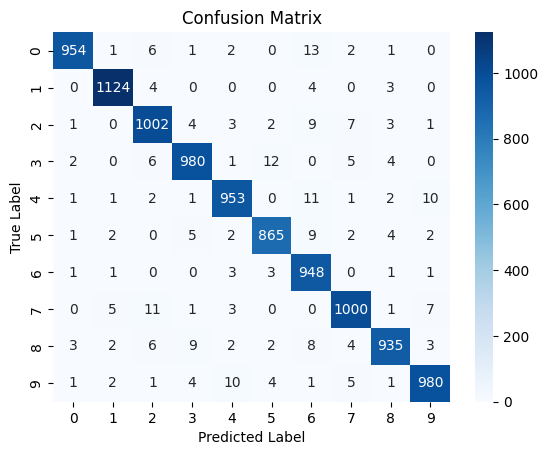

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9741

**Graphs for comparision between training and validation**

*Model Accuracy*

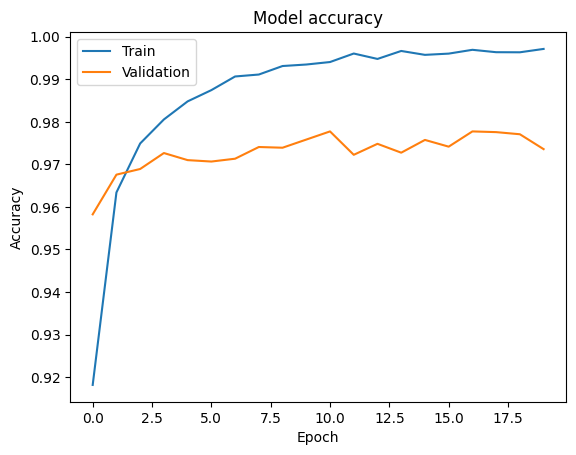

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

*Model Loss*

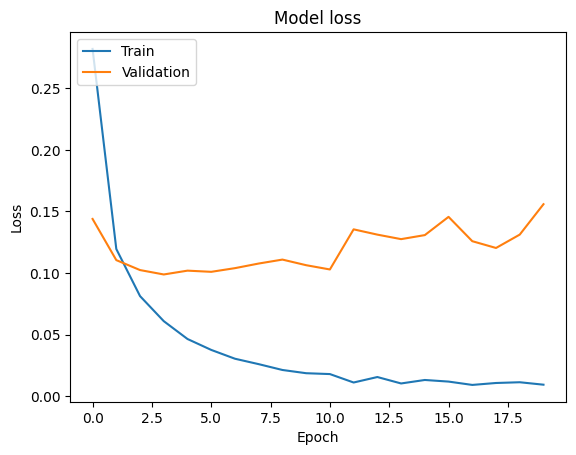

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Predictions**

* We are showing the image to be tested first (from the X_test dataset)

* Using the prediction model

* printing the prediction

*Prediction 1*

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction for the displayed image: 2


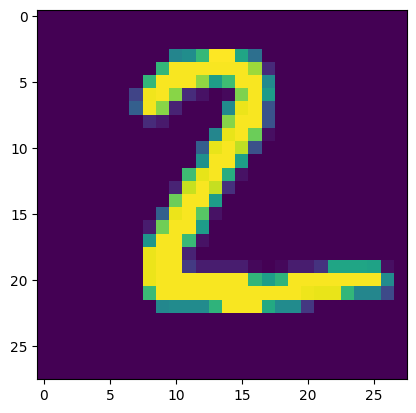

In [ ]:
plt.imshow(X_test[1])
prediction = model.predict(X_test[1].reshape(1, 28, 28)).argmax(axis=1)  # Store prediction
print(f"Prediction for the displayed image: {prediction[0]}")  # Print the stored prediction

*Prediction 2*

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction for the displayed image: 1


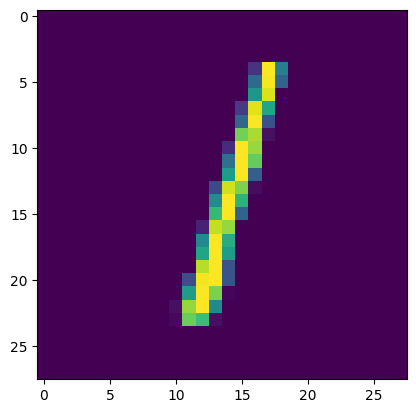

In [ ]:
plt.imshow(X_test[2])
prediction = model.predict(X_test[2].reshape(1, 28, 28)).argmax(axis=1)  # Store prediction
print(f"Prediction for the displayed image: {prediction[0]}")  # Print the stored prediction

*Prdiction 3*

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction for the displayed image: 0


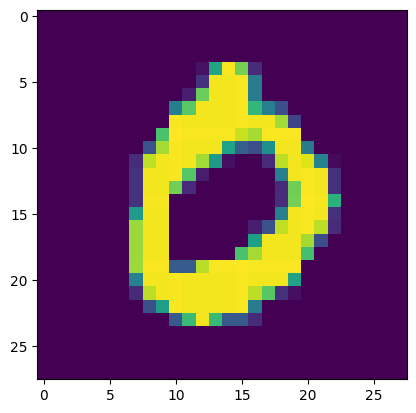

In [ ]:
plt.imshow(X_test[3])
prediction = model.predict(X_test[3].reshape(1, 28, 28)).argmax(axis=1)  # Store prediction
print(f"Prediction for the displayed image: {prediction[0]}")  # Print the stored prediction

*Prediction 4*

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction for the displayed image: 4


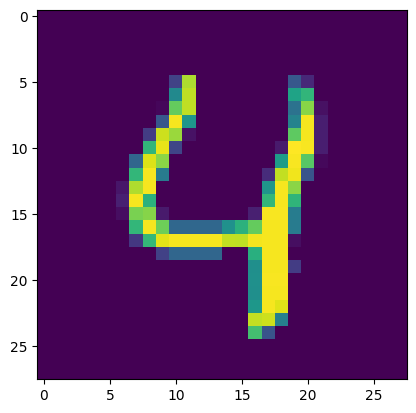

In [ ]:
plt.imshow(X_test[4])
prediction = model.predict(X_test[4].reshape(1, 28, 28)).argmax(axis=1)  # Store prediction
print(f"Prediction for the displayed image: {prediction[0]}")  # Print the stored prediction

*Prediction 5*

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediction for the displayed image: 6


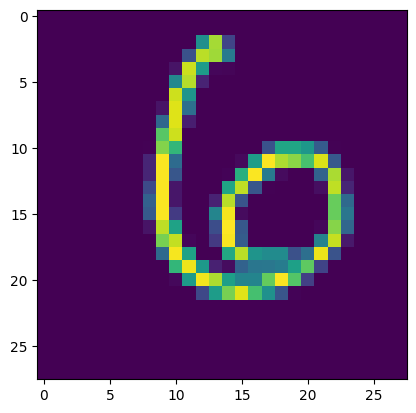

In [ ]:
plt.imshow(X_test[100])
prediction = model.predict(X_test[100].reshape(1, 28, 28)).argmax(axis=1)  # Store prediction
print(f"Prediction for the displayed image: {prediction[0]}")  # Print the stored prediction